In [77]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def mapper(exp, frac, mappings_dir, log=False, add=False, sub=False, mul=False, div=False, dot_size=1):
    operator_flags = {"+": add, "-": sub, "*": mul, "/": div}
    
    color_mapping = {
        "Correct": "green",
        "NAR": "black",
        "Incorrect Non-NAR": "red",
        "Approximation": "blue"
    }

    try:
        graphs = {}
        with open(mappings_dir, 'r') as file:
            lines = file.readlines()

        current_operand = None
        data = []

        for line in lines:
            line = line.strip()

            if line.startswith("Generate '"):
                if current_operand and data:
                    graphs[current_operand] = pd.DataFrame(data, columns=["Result", "Value 1", "Operand", "Value 2", "Output", "Float(64) Value"])
                
                current_operand = line.split("'")[1]

                # Skip if the operator flag is False
                if not operator_flags.get(current_operand, False):
                    current_operand = None
                    continue  # Skip this operator

                data = []
                continue
            
            if not line or "Result" in line:
                continue

            parts = line.split(',')
            if len(parts) != 6:
                continue

            data.append(parts)

        # Ensure last operand is stored if valid
        if current_operand and data:
            graphs[current_operand] = pd.DataFrame(data, columns=["Result", "Value 1", "Operand", "Value 2", "Output", "Float(64) Value"])

        # Only process graphs of enabled operators
        for operand, df in graphs.items():
            if not operator_flags[operand]:  
                continue  # Ensure only flagged operators are plotted

            df["Value 1"] = pd.to_numeric(df["Value 1"], errors="coerce")
            df["Value 2"] = pd.to_numeric(df["Value 2"], errors="coerce")
            df = df.dropna(subset=["Value 1", "Value 2"])
            colors = df["Result"].map(color_mapping).fillna('yellow')

            plt.figure(figsize=(6, 6))
            plt.scatter(df["Value 1"], df["Value 2"], c=colors, s=dot_size)  # Set point size to 1 pixel
            plt.xlabel("Value 1")
            plt.ylabel("Value 2")
            plt.title(f"Operation: {operand}")
            
            if(log):
                plt.xscale("log")
                plt.yscale("log")
            plt.show()

    except FileNotFoundError:
        print(f"Error: Could not find file at: {mappings_dir}")
    except Exception as e:
        print(f"Error: {e}")


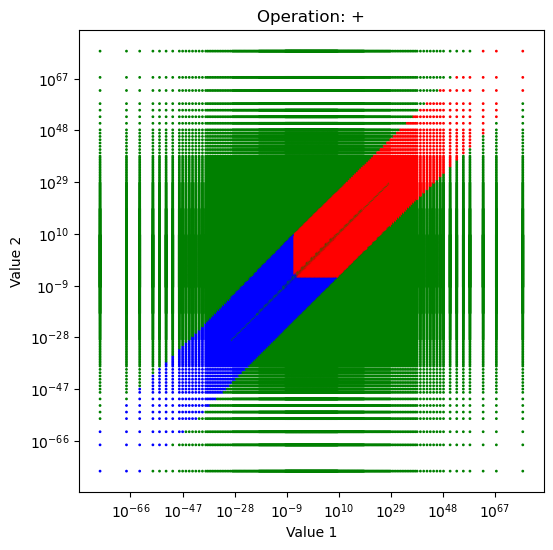

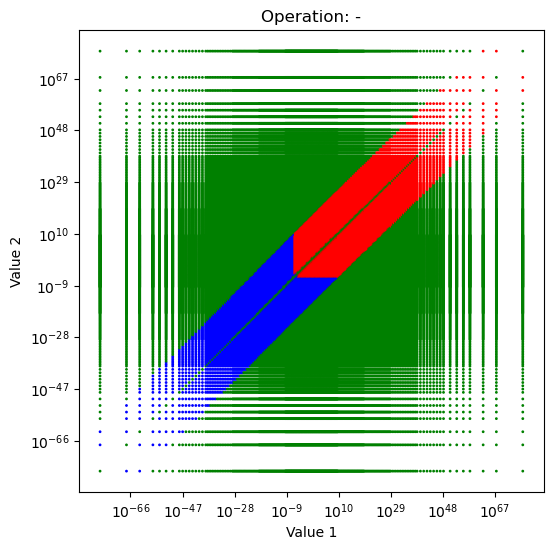

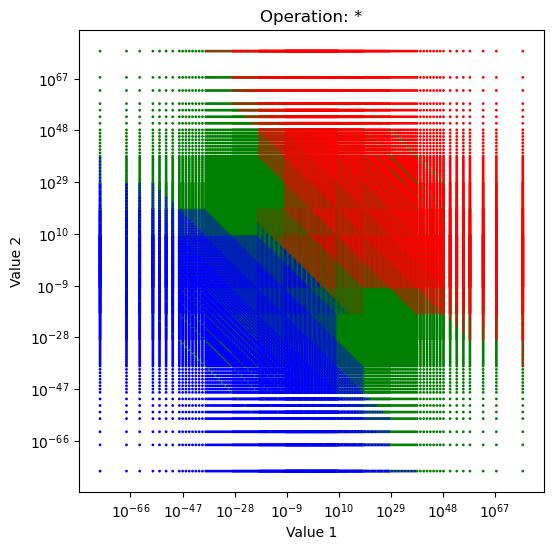

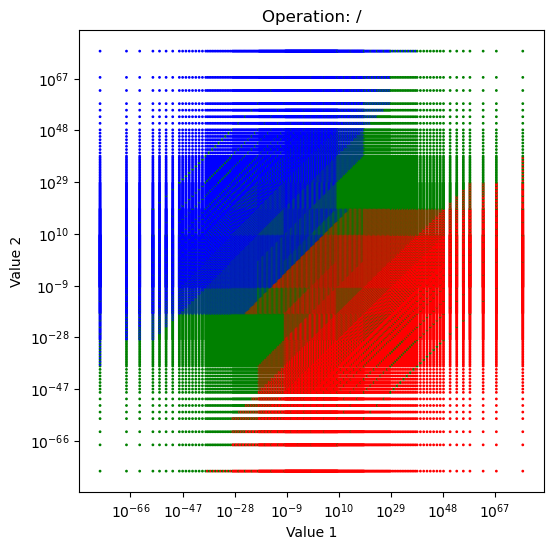

In [ ]:
EXP = 10
FRAC = 5

ADD=True
SUB=True
MUL=True
DIV=True

DOT_SIZE = 1
LOG = True

file_name = f"Posit<{EXP},{FRAC}>"
file_dir = "/Users/colby/Desktop/universal/build/mappings/csv_mappings"
mappings_dir = os.path.join(file_dir, f"{file_name}.csv")

mapper(EXP, FRAC, mappings_dir, dot_size=DOT_SIZE, log=LOG, add=ADD, sub=SUB, mul=MUL, div=DIV)